# WeatherPy
----



In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# List of city data
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        city_weather = requests.get(city_url).json()
        # Parse out the max temp, humidity, and cloudiness
        city_name = city_weather['name']
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"] 
              
            
        # Append the City information into city_data list
        city_data.append({"City": city_name, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    
    # If an error is experienced, skip the city
    except:
        print("Data not found in this row. skip the row...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | arlit
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | taltal
Processing Record 4 of Set 1 | marsh harbour
Processing Record 5 of Set 1 | atuona
Processing Record 6 of Set 1 | ponta do sol
Processing Record 7 of Set 1 | atlantic city
Processing Record 8 of Set 1 | san patricio
Processing Record 9 of Set 1 | nanortalik
Processing Record 10 of Set 1 | wuwei
Processing Record 11 of Set 1 | saint-philippe
Processing Record 12 of Set 1 | vaini
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | constitucion
Processing Record 15 of Set 1 | westport
Processing Record 16 of Set 1 | carnarvon
Processing Record 17 of Set 1 | vila
Processing Record 18 of Set 1 | bluff
Processing Record 19 of Set 1 | cape town
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 

Processing Record 33 of Set 4 | sisimiut
Processing Record 34 of Set 4 | mys shmidta
Data not found in this row. skip the row...
Processing Record 35 of Set 4 | saint george
Processing Record 36 of Set 4 | kaitangata
Processing Record 37 of Set 4 | wencheng
Processing Record 38 of Set 4 | labuhan
Processing Record 39 of Set 4 | vestnes
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | papara
Processing Record 42 of Set 4 | dingle
Processing Record 43 of Set 4 | bethel
Processing Record 44 of Set 4 | clyde river
Processing Record 45 of Set 4 | mahibadhoo
Processing Record 46 of Set 4 | kamaishi
Processing Record 47 of Set 4 | beausejour
Processing Record 48 of Set 4 | barra do bugres
Processing Record 49 of Set 4 | churhat
Processing Record 50 of Set 4 | awbari
Processing Record 1 of Set 5 | vannes
Processing Record 2 of Set 5 | maan
Processing Record 3 of Set 5 | guerrero negro
Processing Record 4 of Set 5 | bilibino
Processing Record 5 of Set 5 | win

Processing Record 18 of Set 8 | san quintin
Processing Record 19 of Set 8 | juneau
Processing Record 20 of Set 8 | ola
Processing Record 21 of Set 8 | goderich
Processing Record 22 of Set 8 | sao joao da barra
Processing Record 23 of Set 8 | corvallis
Processing Record 24 of Set 8 | lavrentiya
Processing Record 25 of Set 8 | lazaro cardenas
Processing Record 26 of Set 8 | half moon bay
Processing Record 27 of Set 8 | hambantota
Processing Record 28 of Set 8 | ayan
Processing Record 29 of Set 8 | katsuura
Processing Record 30 of Set 8 | cadiz
Processing Record 31 of Set 8 | turayf
Processing Record 32 of Set 8 | ostrovnoy
Processing Record 33 of Set 8 | inderborskiy
Data not found in this row. skip the row...
Processing Record 34 of Set 8 | sayyan
Processing Record 35 of Set 8 | ambrolauri
Processing Record 36 of Set 8 | monte alegre
Processing Record 37 of Set 8 | seoul
Processing Record 38 of Set 8 | hofn
Processing Record 39 of Set 8 | ancud
Processing Record 40 of Set 8 | vangaindra

Processing Record 47 of Set 11 | tandil
Processing Record 48 of Set 11 | shenjiamen
Processing Record 49 of Set 11 | hirara
Processing Record 50 of Set 11 | hihifo
Data not found in this row. skip the row...
Processing Record 1 of Set 12 | kutum
Processing Record 2 of Set 12 | marawi
Processing Record 3 of Set 12 | chicla
Processing Record 4 of Set 12 | atasu
Processing Record 5 of Set 12 | portland
Processing Record 6 of Set 12 | mazagao
Processing Record 7 of Set 12 | huangchuan
Processing Record 8 of Set 12 | nguru
Processing Record 9 of Set 12 | pritomskiy
Processing Record 10 of Set 12 | baturaja
Processing Record 11 of Set 12 | turukhansk
Processing Record 12 of Set 12 | nouadhibou
Processing Record 13 of Set 12 | bartica
Processing Record 14 of Set 12 | la ronge
Processing Record 15 of Set 12 | yuksekova
Processing Record 16 of Set 12 | vrangel
Processing Record 17 of Set 12 | beira
Processing Record 18 of Set 12 | khasan
Processing Record 19 of Set 12 | tabas
Processing Record 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert array of dictionaries to a pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(50)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlit,18.7369,7.3853,80.51,18,2,15.70,NE,1666815146
1,Butaritari,3.0707,172.7902,81.99,75,100,13.85,KI,1666815146
2,Taltal,-25.4000,-70.4833,64.00,64,23,6.60,CL,1666815147
3,Marsh Harbour,26.5412,-77.0636,78.44,63,7,10.51,BS,1666815147
4,Atuona,-9.8000,-139.0333,77.22,74,23,19.44,PF,1666815148
5,Ponta do Sol,32.6667,-17.1000,74.01,80,65,5.41,PT,1666815148
6,Atlantic City,39.3643,-74.4229,68.18,88,100,10.36,US,1666814936
7,San Patricio,28.0170,-97.5169,80.17,25,0,11.45,US,1666815149
8,Nanortalik,60.1432,-45.2371,34.83,95,100,4.43,GL,1666815149
9,Wuwei,37.9281,102.6414,46.02,58,2,1.41,CN,1666815150


In [6]:
city_data_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,551.000000,551.000000,551.000000,551.000000,551.000000,551.000000,5.510000e+02
mean,20.042766,15.834588,60.653394,72.963702,59.838475,8.010091,1.666816e+09
std,33.317244,89.012390,20.662956,20.822596,40.722534,5.511747,2.905463e+02
min,-54.800000,-175.200000,-5.840000,10.000000,0.000000,0.000000,1.666815e+09
25%,-7.195150,-63.143650,48.515000,62.000000,16.000000,4.105000,1.666815e+09
50%,24.800000,20.883300,66.110000,78.000000,75.000000,6.820000,1.666816e+09
75%,47.850000,91.503500,76.450000,89.000000,100.000000,10.555000,1.666816e+09
max,78.218600,179.316700,98.830000,100.000000,100.000000,33.380000,1.666816e+09


In [7]:
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

In [8]:
#Export the created dataframe to .csv file
city_data_df.to_csv('output_data/city_data.csv', index = False, header = True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
city_data_humidity_df = city_data_df.loc[(city_data_df["Humidity"] >100)]
city_data_humidity_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [10]:
#  Get the indices of cities that have humidity over 100%.
city_data_humidity_df.index

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
city_index =city_data_df[(city_data_df["Humidity"] >100)].index
city_data_df.drop(city_index , inplace=True)
city_data_df.head()
  

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Arlit,18.7369,7.3853,80.51,18,2,15.70,NE,1666815146
1,Butaritari,3.0707,172.7902,81.99,75,100,13.85,KI,1666815146
2,Taltal,-25.4000,-70.4833,64.00,64,23,6.60,CL,1666815147
3,Marsh Harbour,26.5412,-77.0636,78.44,63,7,10.51,BS,1666815147
4,Atuona,-9.8000,-139.0333,77.22,74,23,19.44,PF,1666815148


In [12]:
city_data_df.count()

City          551
Lat           551
Lng           551
Max Temp      551
Humidity      551
Cloudiness    551
Wind Speed    551
Country       551
Date          551
dtype: int64

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

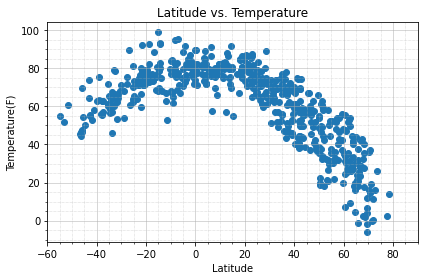

In [13]:
#Havent created the images file and change the command line
x_axis_data = city_data_df["Lat"]
y_axis_data = city_data_df["Max Temp"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,90)
plt.tight_layout()
#plot and show
plt.savefig("output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

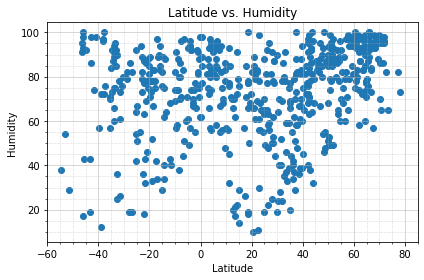

In [14]:
#Havent created the images file and change the command line
x_axis_data = city_data_df["Lat"]
y_axis_data = city_data_df["Humidity"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#save and plot 
plt.savefig("output_data/lat_humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

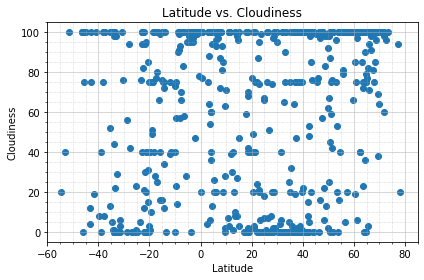

In [15]:
#Havent created the images file and change the command line
x_axis_data = city_data_df["Lat"]
y_axis_data = city_data_df["Cloudiness"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#Save and Plot
plt.savefig("output_data/lat_cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

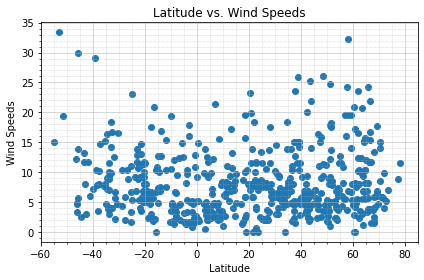

In [16]:
#Havent created the images file and change the command line
x_axis_data = city_data_df["Lat"]
y_axis_data = city_data_df["Wind Speed"]

#Plotting scatter plot for Latitude vs. Temperature Plot
plt.scatter(x_axis_data,y_axis_data)
plt.title('Latitude vs. Wind Speeds')
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds')
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
plt.xlim(-60,85)
plt.tight_layout()
#save and plot
plt.savefig("output_data/lat_windspeed.png")
plt.show()

## Linear Regression

In [17]:
#Linear regression plots
#Using the lat column, seperate the data to Northern Hemisphere and Southern Hemisphere
# If lat is greater than 0, then Northern Hemisphere.
#If lat is lesser than 0, the Southern Hemisphere
#Using split to seperate the column data
northern_hemi = city_data_df[city_data_df['Lat'] > 0]
southern_hemi = city_data_df[city_data_df['Lat'] < 0]
northern_hemi.count()

City          381
Lat           381
Lng           381
Max Temp      381
Humidity      381
Cloudiness    381
Wind Speed    381
Country       381
Date          381
dtype: int64

In [18]:
southern_hemi.count()

City          170
Lat           170
Lng           170
Max Temp      170
Humidity      170
Cloudiness    170
Wind Speed    170
Country       170
Date          170
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7448901035837259


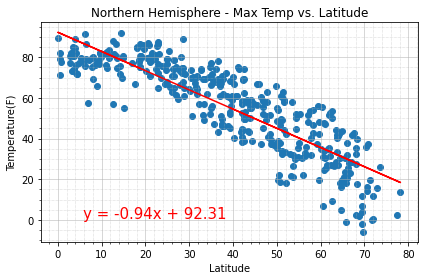

In [19]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#Save and plot
plt.savefig("output_data/North_lat_temp_reg.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4778658399571751


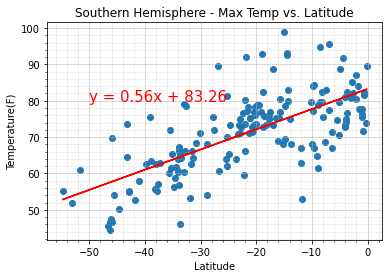

In [20]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Temperature(F)')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
#plt.tight_layout()
#save and plot 
plt.savefig("output_data/South_lat_temp_reg.png")
plt.show()

From the above two plot, The Maxtemp vs latitude regression plot shows positive correlation for Southern Hemisphere 
and negative correlation for the Northern Hemisphere. The data points are slightly dispersed. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10433996959056312


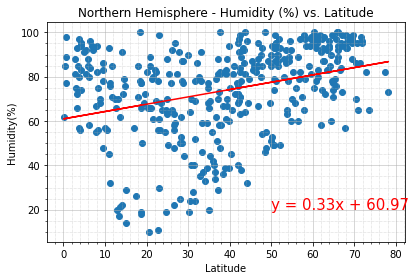

In [21]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#Save and Plot
plt.savefig("output_data/North_lat_humidity_reg.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0056362175071286175


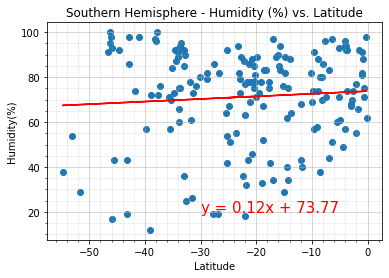

In [22]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
#plt.tight_layout()
#save and Plot
plt.savefig("output_data/South_lat_humidity_reg.png")
plt.show()

From the above two plot, Northern Hemissphere shows positive correlation and the southern Hemisphere shows a neagative corelation for humidiy. However, The data points are dispersed.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06704115519365449


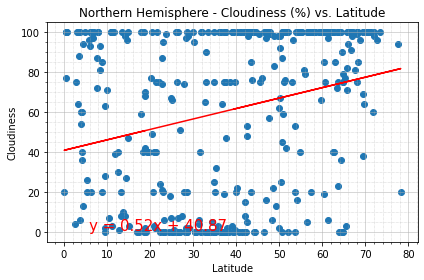

In [23]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#Save and Plot
plt.savefig("output_data/North_lat_cloud_reg.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.07775048338219706


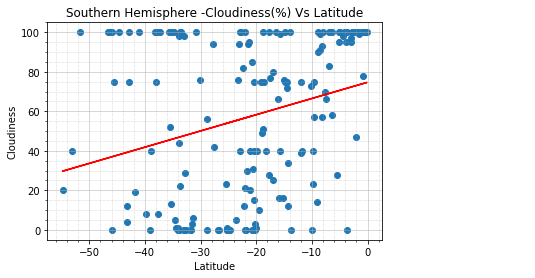

In [24]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.title('Southern Hemisphere -Cloudiness(%) Vs Latitude')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
#plt.tight_layout()
plt.savefig("output_data/South_lat_cloud_reg.png")
plt.show()

From the above two plot, Both Northern and Southern hemispher exhibits a positive correlation towards cloudiness. However, the data points are dispersed.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02020935485155019


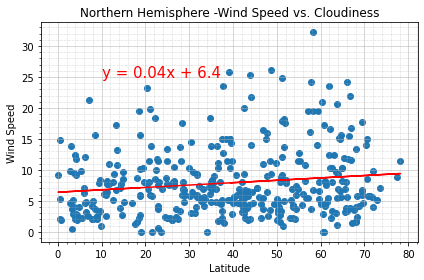

In [25]:
# Print out the r-squared value along with the plot.
x_values = northern_hemi['Lat']
y_values = northern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")
plt.title('Northern Hemisphere -Wind Speed vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
plt.tight_layout()
#save and show plot
plt.savefig("output_data/North_lat_wind_reg.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0982826116955656


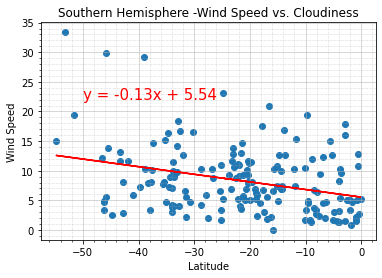

In [26]:
# Print out the r-squared value along with the plot.
x_values = southern_hemi['Lat']
y_values = southern_hemi['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
plt.title('Southern Hemisphere -Wind Speed vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
#print the r-squared value
print(f"The r-squared is: {rvalue**2}")
plt.minorticks_on()
plt.grid(which = 'major', linestyle = '-', linewidth = 0.5 )
plt.grid(which = 'minor', linestyle = ':', linewidth = 0.5 )
#plt.xlim(-60,85)
#plt.tight_layout()
plt.savefig("output_data/South_lat_wind_reg.png")
plt.show()

The regression model for Northern Hemisphere is positive correlation while Southern Hemisphere is negative correlation for the wind speed(mph). The data points are more for Northern hemisphere than the Southern Hemisphere.